<a href="https://colab.research.google.com/github/POOJACH76/Mental_Health_Prediction/blob/main/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/survey (2).csv")

In [3]:
df.head(10)

,Age,Gender,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,...,a1nymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,1,NaN,1,0,0.0,1,0,0.0,0,...,0,1,1,1,NaN,0,1,3,0,1
1,44,0,NaN,1,1,3.0,1,1,3.0,1,...,3,3,3,1,1.0,1,1,1,3,1
2,32,0,NaN,1,1,3.0,1,0,1.0,1,...,3,0,1,1,0.0,0,0,0,1,1
3,31,0,NaN,0,0,0.0,1,0,1.0,0,...,1,0,0,0,1.0,1,3,3,1,0
4,31,0,NaN,1,1,1.0,0,0,0.0,1,...,3,3,1,1,1.0,0,0,0,3,1
5,33,0,NaN,0,1,3.0,1,0,0.0,0,...,3,3,1,1,0.0,0,1,3,3,1
6,35,1,NaN,0,0,3.0,0,0,1.0,1,...,1,0,3,3,1.0,1,1,1,3,1
7,39,0,NaN,1,1,1.0,0,0,1.0,0,...,0,3,1,1,1.0,1,1,1,1,1
8,42,1,NaN,0,0,3.0,1,0,0.0,0,...,1,0,3,1,0.0,0,1,3,1,1
9,23,0,NaN,1,1,1.0,1,0,3.0,1,...,3,3,1,1,0.0,0,3,3,0,1


In [4]:
df.drop(['remote_work', 'benefits', 'care_options', 'wellness_program', 'a1nymity', 'mental_health_consequence', 'phys_health_consequence', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical'], axis=1, inplace=True)


In [5]:
self_employed_mean = df['self_employed'].mean()
work_interfere_mean = df['work_interfere'].mean()
coworkers_mean = df['coworkers'].mean()

df['self_employed'].fillna(self_employed_mean, inplace=True)
df['work_interfere'].fillna(work_interfere_mean, inplace=True)
df['coworkers'].fillna(coworkers_mean, inplace=True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1259 non-null   int64  
 1   Gender           1259 non-null   int64  
 2   self_employed    1259 non-null   float64
 3   family_history   1259 non-null   int64  
 4   treatment        1259 non-null   int64  
 5   work_interfere   1259 non-null   float64
 6   tech_company     1259 non-null   int64  
 7   seek_help        1259 non-null   int64  
 8   leave            1259 non-null   int64  
 9   coworkers        1259 non-null   float64
 10  supervisor       1259 non-null   int64  
 11  obs_consequence  1259 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 118.2 KB


In [7]:
df.head(2)

,Age,Gender,self_employed,family_history,treatment,work_interfere,tech_company,seek_help,leave,coworkers,supervisor,obs_consequence
0,37,1,0.882353,1,0,0.0,0,0,1,0.821145,0,1
1,44,0,0.882353,1,1,3.0,1,3,3,1.000000,1,1


In [8]:
df['treatment'].unique()

array([0, 1])

In [9]:
X = df.drop("treatment", axis=1 )
y= df["treatment"]


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1259 non-null   int64  
 1   Gender           1259 non-null   int64  
 2   self_employed    1259 non-null   float64
 3   family_history   1259 non-null   int64  
 4   treatment        1259 non-null   int64  
 5   work_interfere   1259 non-null   float64
 6   tech_company     1259 non-null   int64  
 7   seek_help        1259 non-null   int64  
 8   leave            1259 non-null   int64  
 9   coworkers        1259 non-null   float64
 10  supervisor       1259 non-null   int64  
 11  obs_consequence  1259 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 118.2 KB


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=45)
from sklearn import metrics

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=45)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

Random Forest Accuracy: 80.16%


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_scores(model, actual, predicted):
    print(f"Model: {model}")


    accuracy = metrics.accuracy_score(actual, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    conf_matrix = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Model: Random Forest
Accuracy: 80.16%


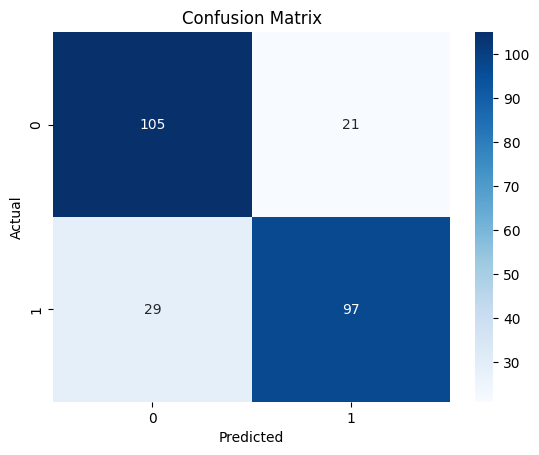

In [15]:
get_scores("Random Forest", y_test, rf_y_pred)


Model: Random Forest
Accuracy: 80.16%


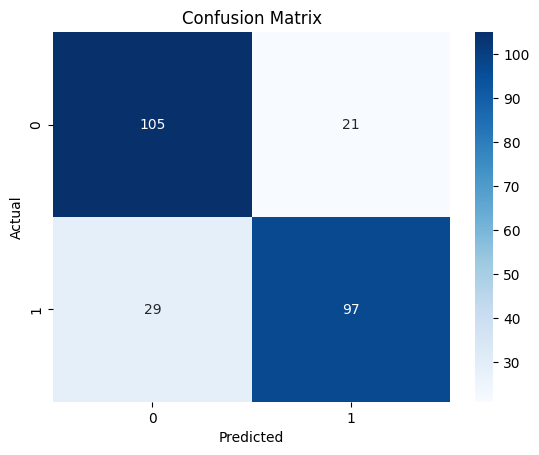

In [16]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [700, 300, 400],
    'max_depth': [5, 10, 20]
}
rf_model = RandomForestClassifier(random_state=45)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_



rf_y_pred_tuned = best_rf_model.predict(X_test)

get_scores("Random Forest", y_test, rf_y_pred)

In [17]:
import pickle
filename= "best_rf_model.pkl"

with open(filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

In [18]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
decision_tree_classifier.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_classifier.predict(X_test)
decision_tree_accuracy = metrics.accuracy_score(y_test, decision_tree_y_pred)
print(f"Decision Tree Accuracy: {decision_tree_accuracy * 100:.2f}%")

Decision Tree Accuracy: 80.56%


Model: Decision Tree
Accuracy: 80.56%


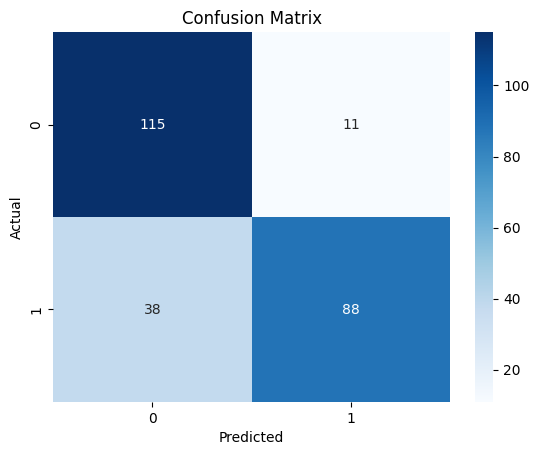

In [19]:
get_scores("Decision Tree", y_test, decision_tree_y_pred)

In [20]:
from xgboost import XGBClassifier
xgboost_classifier = XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.1)
xgboost_classifier.fit(X_train, y_train)
xgboost_y_pred = xgboost_classifier.predict(X_test)

xgboost_accuracy = metrics.accuracy_score(y_test, xgboost_y_pred)
print(f"XGBoost Accuracy: {xgboost_accuracy * 100:.2f}%")

XGBoost Accuracy: 78.17%


Model: XGBoost
Accuracy: 78.17%


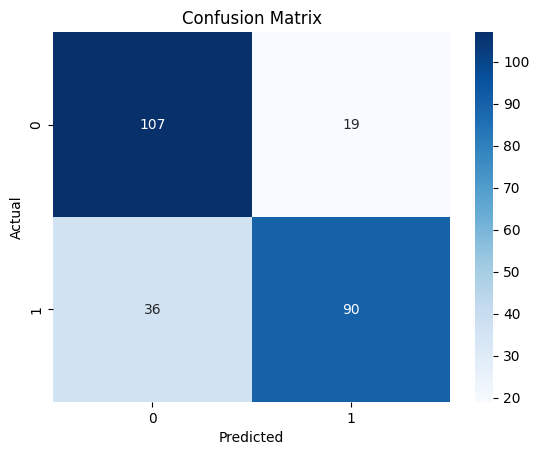

In [21]:
get_scores("XGBoost", y_test, xgboost_y_pred)

In [22]:

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score

n_folds = 5

kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
rf_model = RandomForestClassifier(random_state=45)

cv_predictions = cross_val_predict(rf_model, X_train, y_train, cv=kf)
cv_accuracy = accuracy_score(y_train, cv_predictions)
cv_confusion_matrix = confusion_matrix(y_train, cv_predictions)

print("Cross-validation accuracy:", cv_accuracy)
print("Confusion matrix for each fold:")
for i, conf_matrix in enumerate(cv_confusion_matrix):
    print(f"Fold {i+1}:\n{conf_matrix}")

Cross-validation accuracy: 0.7994041708043694
Confusion matrix for each fold:
Fold 1:
[425  86]
Fold 2:
[116 380]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_train, cv_predictions))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       511
           1       0.82      0.77      0.79       496

    accuracy                           0.80      1007
   macro avg       0.80      0.80      0.80      1007
weighted avg       0.80      0.80      0.80      1007



In [25]:
unseen_data = pd.read_csv("/content/MentalHealth.csv")

In [26]:
#unseen_data.drop("Timestamp", axis=1, inplace=True)

In [27]:
unseen_data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'tech_company', 'seek_help', 'leave', 'coworkers',
       'supervisor', 'obs_consequence'],
      dtype='object')

In [28]:


unseen_data = pd.read_csv("/content/MentalHealth.csv")

In [29]:
unseen_data.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'tech_company', 'seek_help', 'leave', 'coworkers',
       'supervisor', 'obs_consequence'],
      dtype='object')

In [30]:
import pickle
filename= "best_rf_model.pkl"

with open(filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

In [31]:
import pickle
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
filename = "best_rf_model.pkl"
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

if loaded_model is not None:

    unseen_data = pd.read_csv("/content/MentalHealth.csv")

    X_unseen = unseen_data.drop(['treatment'], axis=1)
    y_true = unseen_data['treatment']

    y_pred = loaded_model.predict(X_unseen)

    unseen_accuracy = metrics.accuracy_score(y_true, y_pred)
    print(f"Random Forest Accuracy on Unseen Data: {unseen_accuracy * 100:.2f}%")

    confusion_matrix_unseen = metrics.confusion_matrix(y_true, y_pred)
    print("Confusion Matrix for Unseen Data:")
    print(confusion_matrix_unseen)


    y_probs = loaded_model.predict_proba(X_unseen)
    probability_df = pd.DataFrame(y_probs, columns=loaded_model.classes_)
    probability_df['treatment'] = unseen_data['treatment'].values
    print(probability_df)

    prob_no = y_probs[:, 0]
    prob_yes = y_probs[:, 1]
    print(f"Probability of 'no': {prob_no[0] * 100:.2f}%")
    print(f"Probability of 'yes': {prob_yes[0] * 100:.2f}%")
else:
    print("The model has not been loaded correctly.")


Random Forest Accuracy on Unseen Data: 45.45%
Confusion Matrix for Unseen Data:
[[ 2  0]
 [12  8]]
           0         1  treatment
0   0.780000  0.220000          1
1   0.646929  0.353071          1
2   0.524286  0.475714          1
3   0.872857  0.127143          1
4   0.948571  0.051429          1
5   0.525714  0.474286          1
6   0.844286  0.155714          0
7   0.874762  0.125238          1
8   0.964048  0.035952          1
9   0.740000  0.260000          1
10  0.850000  0.150000          1
11  0.102857  0.897143          1
12  0.464286  0.535714          1
13  0.464286  0.535714          1
14  0.454286  0.545714          1
15  0.025714  0.974286          1
16  0.720000  0.280000          1
17  0.039214  0.960786          1
18  0.198571  0.801429          1
19  0.752857  0.247143          1
20  0.892857  0.107143          0
21  0.404857  0.595143          1
Probability of 'no': 78.00%
Probability of 'yes': 22.00%


In [32]:
import pandas as pd
import pickle

filename = "/content/best_rf_model.pkl"

with open(filename, 'rb') as file:
    best_rf_model = pickle.load(file)

custom_data = pd.DataFrame({
    'Age': [37],
    'Gender': [1],
    'self_employed': [0.88],
    'family_history': [1],
    'work_interfere': [0.0],
    'tech_company':[0],
    'seek_help':[0],
    'leave':[1],
    'coworkers':[0.82],
    'supervisor':[0],
    'obs_consequence':[1]
})

predictions = best_rf_model.predict(custom_data)
probability_scores = best_rf_model.predict_proba(custom_data)

risk_mapping = {0: 'yes', 1: 'no'}
predictions = [risk_mapping[pred] for pred in predictions]

print("Predictions:")
print(predictions)

print("Probability Scores:")
print(probability_scores)


Predictions:
['yes']
Probability Scores:
[[0.70285714 0.29714286]]
